In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
plt.style.use('ggplot')

In [4]:
!ls /home/avocado/Desktop/YunEDA/dim_store.csv

/home/avocado/Desktop/YunEDA/dim_store.csv


In [2]:
tmp = pd.read_csv("/home/avocado/Desktop/YunEDA/sr_daily.csv")

In [3]:
tmp = tmp[['calendar_date', 'store_code', 'item_code', 'sr']]
tmp.columns = ['date', 'store', 'item', 'sales']

In [2]:
train = pd.read_csv("train.csv")

In [4]:
train = tmp

In [5]:
train.head(5)

,date,store,item,sales
0,2015-07-01,SHA118,100007,448.462929
1,2015-07-01,SHA118,200018,48.824593
2,2015-07-01,SHA118,200019,46.112116
3,2015-07-01,SHA118,200020,217.902351
4,2015-07-01,SHA118,200021,58.770344


In [4]:
train.shape

(913000, 4)

In [6]:
train.date = pd.to_datetime(train.date)

In [7]:
train['year'] = train.date.dt.year
train['month'] = train.date.dt.month
train['month_year'] = train.date.dt.to_period('M')
train.head(5)

,date,store,item,sales,year,month,month_year
0,2015-07-01,SHA118,100007,448.462929,2015,7,2015-07
1,2015-07-01,SHA118,200018,48.824593,2015,7,2015-07
2,2015-07-01,SHA118,200019,46.112116,2015,7,2015-07
3,2015-07-01,SHA118,200020,217.902351,2015,7,2015-07
4,2015-07-01,SHA118,200021,58.770344,2015,7,2015-07


In [8]:
train.drop(train[(train.sales.isnull()) | (train.sales == float('inf'))].index, inplace=True)

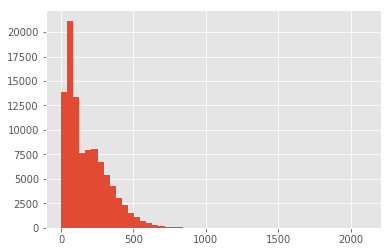

In [9]:
plt.hist(train.sales, bins=50)
plt.show()

In [10]:
mean_sales = train.groupby(['date'], as_index=False)
mean_sales = mean_sales[['sales']].mean()
mean_sales['idx'] = mean_sales.index

In [11]:
mean_sales.head()

,date,sales,idx
0,2015-07-01,157.968287,0
1,2015-07-02,154.875411,1
2,2015-07-03,149.563150,2
3,2015-07-04,172.930137,3
4,2015-07-05,177.005901,4


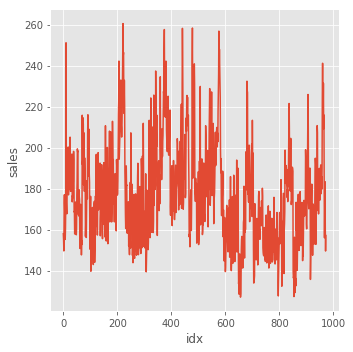

In [12]:
g = sns.relplot(x="idx", y="sales", data=mean_sales, kind="line")

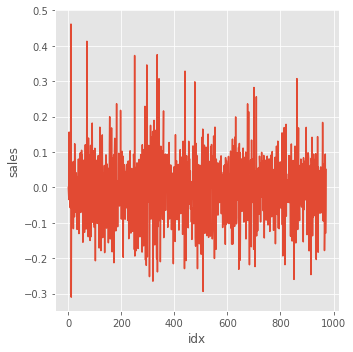

In [13]:
rt = pd.Series(mean_sales["sales"]).pct_change()
rt = pd.DataFrame(rt)
rt["idx"] = rt.index
rt.fillna(0, inplace=True)
g = sns.relplot(y="sales", x="idx", data=rt, kind="line")

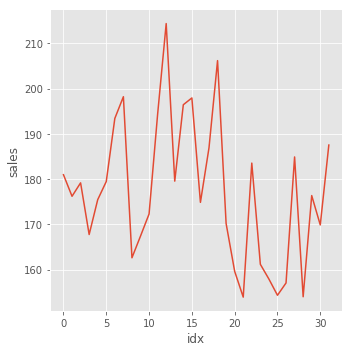

In [14]:
mean_sales_monthly = train.groupby(["month_year"], as_index=False)
mean_sales_monthly = mean_sales_monthly[["sales"]].mean()
mean_sales_monthly["idx"] = mean_sales_monthly.index
g = sns.relplot(y="sales", x="idx", data=mean_sales_monthly, kind="line")

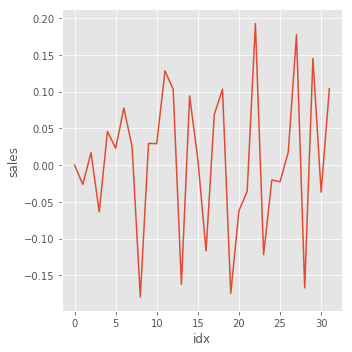

In [15]:
rt = pd.Series(mean_sales_monthly["sales"]).pct_change()
rt = pd.DataFrame(rt)
rt["idx"] = rt.index
rt.fillna(0, inplace=True)
g = sns.relplot(x="idx", y="sales", data=rt, kind="line")

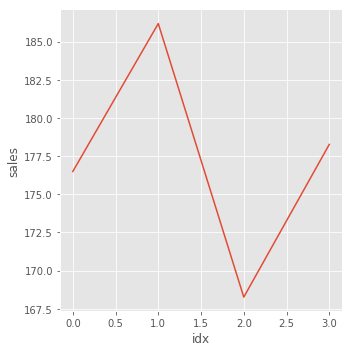

In [16]:
mean_sales_yearly = train.groupby(['year'], as_index=False)
mean_sales_yearly = mean_sales_yearly[["sales"]].mean()
mean_sales_yearly['idx'] = mean_sales_yearly.index
g = sns.relplot(x="idx", y="sales", data=mean_sales_yearly, kind="line")

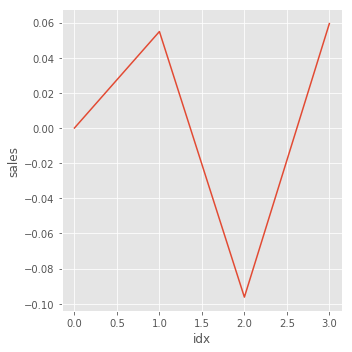

In [17]:
rt = pd.Series(mean_sales_yearly["sales"]).pct_change()
rt = pd.DataFrame(rt)
rt["idx"] = rt.index
rt.fillna(0, inplace=True)
g = sns.relplot(x="idx", y="sales", data=rt, kind="line")

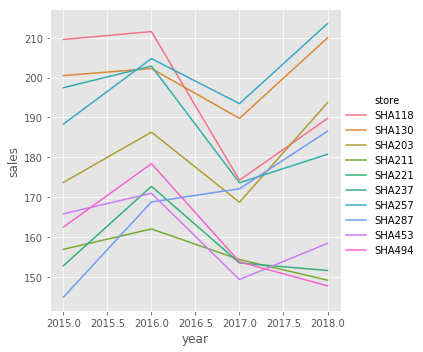

In [18]:
data = train.groupby(['store', 'year'])
mean = data[["sales"]].mean()
mean = mean.add_suffix('').reset_index()
g = sns.relplot(x="year", y="sales", data=mean, kind="line", hue="store")

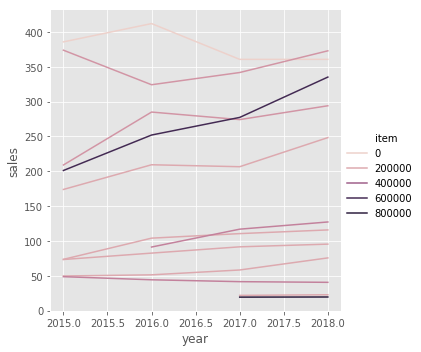

In [19]:
data = train.groupby(['item',"year"])
mean = data[["sales"]].mean()
mean = mean.add_suffix('').reset_index()
g = sns.relplot(y="sales", x="year", data=mean, kind="line", hue="item")

In [16]:
import warnings 
warnings.filterwarnings('ignore')

In [17]:
s1i1 = train[(train["store"] == 1) & (train["item"]) == 1]
s1i1["sales"] = np.log1p(s1i1["sales"])
s1i1.head()

,date,store,item,sales,year,month,month_year
0,2013-01-01,1,1,2.639057,2013,1,2013-01
1,2013-01-02,1,1,2.484907,2013,1,2013-01
2,2013-01-03,1,1,2.708050,2013,1,2013-01
3,2013-01-04,1,1,2.639057,2013,1,2013-01
4,2013-01-05,1,1,2.397895,2013,1,2013-01


In [18]:
stats = s1i1[['date', 'sales']]
stats.columns = ["ds", "y"]
stats.head()

,ds,y
0,2013-01-01,2.639057
1,2013-01-02,2.484907
2,2013-01-03,2.708050
3,2013-01-04,2.639057
4,2013-01-05,2.397895


In [19]:
m = Prophet()
m.fit(stats)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
46010,2018-12-27
46011,2018-12-28
46012,2018-12-29
46013,2018-12-30
46014,2018-12-31


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
46010,2018-12-27,3.540395,2.856791,4.193903
46011,2018-12-28,3.603071,2.959731,4.204497
46012,2018-12-29,3.665937,3.012076,4.330526
46013,2018-12-30,3.721256,3.078570,4.378822
46014,2018-12-31,3.317817,2.644368,3.938995


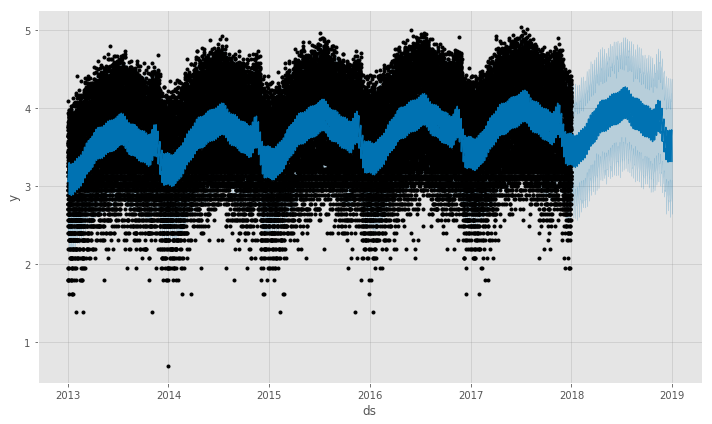

In [26]:
fig1 = m.plot(forecast)

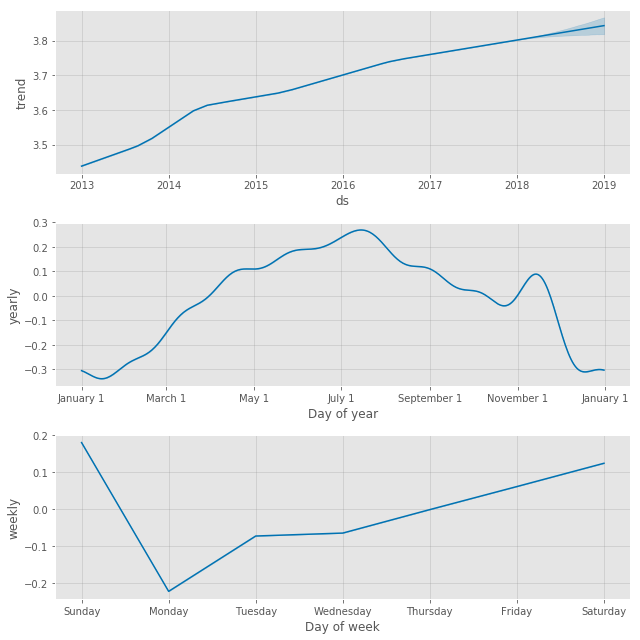

In [27]:
fig2 = m.plot_components(forecast)